1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

In [6]:
n = 1000
x1 = np.random.normal(0,1,(1,n))
x2 = x1 + np.random.normal(0,3,(1,n))
x3 = 2*x1 + x2

print('x1 shape', x1.shape)
print('x2 shape', x2.shape)
print('x3 shape', x3.shape)

X = np.concatenate((x1,x2,x3), axis = 0)
print('X shape', X.shape)

x1 shape (1, 1000)
x2 shape (1, 1000)
x3 shape (1, 1000)
X shape (3, 1000)


In [9]:
cov = np.cov(X)
print('Numpy cov:\n',cov, '\n')
c_cov = np.dot(X, X.T)/(n-1)
print('Calculated cov:\n',c_cov, '\n')

l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

Numpy cov:
 [[ 1.04937715  1.13842573  3.23718003]
 [ 1.13842573 10.01735745 12.29420892]
 [ 3.23718003 12.29420892 18.76856897]] 

Calculated cov:
 [[ 1.04941577  1.13823426  3.23706581]
 [ 1.13823426 10.01830659 12.29477512]
 [ 3.23706581 12.29477512 18.76890674]] 

Eigenvalues:
 [ 2.78498016e+01 -9.42257943e-16  1.98550201e+00] 

Eigenvectors:
 [[-0.12240796 -0.81649658  0.5642248 ]
 [-0.56862347 -0.40824829 -0.71414332]
 [-0.81343939  0.40824829  0.41430628]] 



In [10]:
U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(n-1)
V_svd = U

print("SVD eigenvalues: ")
print(l_svd)
print("SVD eigenvector: ")
print(U)

SVD eigenvalues: 
[2.78508069e+01 1.98582218e+00 3.68144440e-32]
SVD eigenvector: 
[[-0.12239559  0.56422748 -0.81649658]
 [-0.56863913 -0.71413085 -0.40824829]
 [-0.8134303   0.41432412  0.40824829]]


Lambda:
 [[ 2.78498016e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.98550201e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.42257943e-16]]
Percentage of the total dataset's variability explained by the principal components:  93.34512548939425
By selecting the component 0 and 1, we retain 100.00% of the total variability


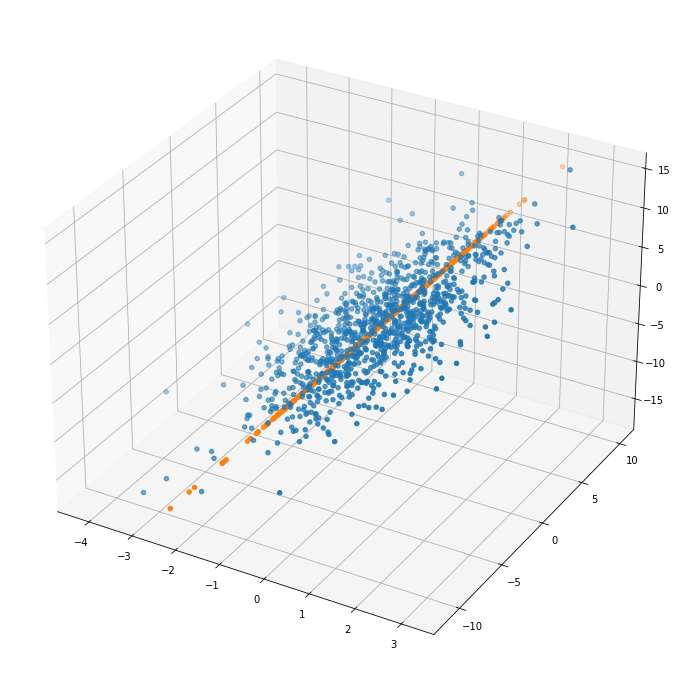

In [14]:
Lambda = np.diag(np.sort(l)[::-1])
print('Lambda:\n',Lambda)
p_component = Lambda[0,0]/Lambda.trace()
r_variability = ((Lambda[0,0]+Lambda[1,1])/Lambda.trace())
print("Percentage of the total dataset's variability explained by the principal components: ",(p_component*100))
print("By selecting the component 0 and 1, we retain %.2f%% of the total variability" % (r_variability*100))

idx = np.argsort(l)[::-1]
V_sorted = V[:,idx]
Xp = np.dot(V.T,X)
Feature_V = np.delete(V_sorted,2,1)
Xpp = np.dot(Feature_V, Xp[0:2,:])

fig = plt.figure(figsize=(12,40))
ax = plt.axes(projection='3d')

ax.scatter3D(X[0,:],X[1,:],X[2,:])
ax.scatter3D(Xpp[0,:],Xpp[1,:],Xpp[2,:])

plt.show()

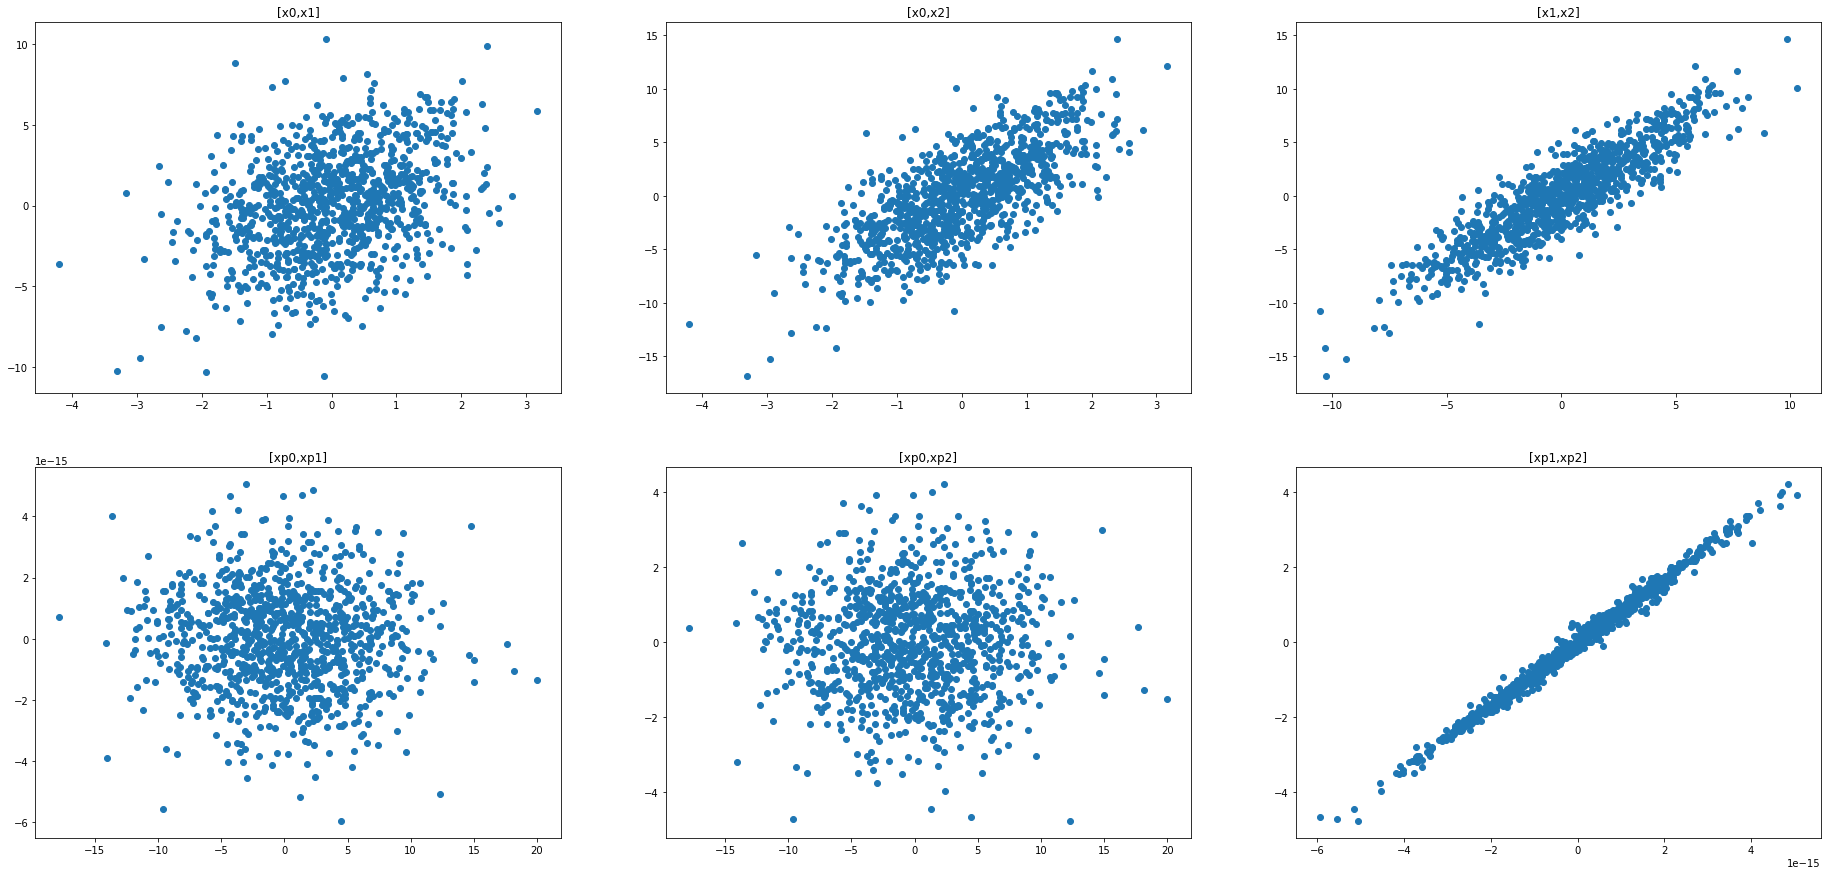

In [20]:
fig, axs = plt.subplots(2,3,figsize=(32,15))
axs[0][0].set_title('[x0,x1]')
axs[0][0].scatter(X[0,:],X[1,:])
axs[0][1].set_title('[x0,x2]')
axs[0][1].scatter(X[0,:],X[2,:])
axs[0][2].set_title('[x1,x2]')
axs[0][2].scatter(X[1,:],X[2,:])

axs[1][0].set_title('[xp0,xp1]')
axs[1][0].scatter(Xp[0,:],Xp[1,:])
axs[1][1].set_title('[xp0,xp2]')
axs[1][1].scatter(Xp[0,:],Xp[2,:])
axs[1][2].set_title('[xp1,xp2]')
axs[1][2].scatter(Xp[1,:],Xp[2,:])

plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [21]:
std_factor = 20
noise = np.random.normal(0,1/std_factor,(10,n))
n_X = np.concatenate((X,noise),axis = 0)

cov = np.cov(n_X)
print('Numpy cov shape: ',cov.shape)

l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

Numpy cov shape:  (13, 13)
Eigenvalues:
 [ 2.78498188e+01  1.98553902e+00 -1.19379345e-15  2.03794336e-03
  2.80488974e-03  2.18600148e-03  2.25199102e-03  2.35539486e-03
  2.43261352e-03  2.49390894e-03  2.55616446e-03  2.71341256e-03
  2.72067269e-03] 

Eigenvectors:
 [[-1.22407909e-01 -5.64219582e-01 -8.16496581e-01  6.07901796e-04
  -4.30338475e-04 -3.22325803e-05 -1.11496141e-04  9.46722920e-04
  -1.41593857e-03 -9.96425185e-04  7.78664707e-05 -1.18940764e-03
   1.33943528e-04]
 [-5.68623310e-01  7.14136441e-01 -4.08248290e-01 -9.67779435e-04
   2.64759036e-04 -2.39953337e-06  4.15570233e-04 -1.09467703e-03
   1.69017483e-03  1.34299968e-03  1.07779745e-04  1.68789944e-03
  -3.31581741e-04]
 [-8.13439128e-01 -4.14302723e-01  4.08248290e-01  2.48024157e-04
  -5.95917914e-04 -6.68646941e-05  1.92577950e-04  7.98768806e-04
  -1.14170231e-03 -6.49850694e-04  2.63512686e-04 -6.90915839e-04
  -6.36946847e-05]
 [-1.63505759e-04 -2.35406918e-03 -2.35405872e-15  4.00587746e-01
   2.5469168

In [22]:
Lambda = np.diag(np.sort(l)[::-1])
p_component = Lambda[0,0]/Lambda.trace()
r_variability = ((Lambda[0,0]+Lambda[1,1])/Lambda.trace())
print("Percentage of the total dataset's variability explained by the principal components: ",(p_component*100))
print("By selecting the component 0 and 1, we retain %.2f%% of the total variability" % (r_variability*100))

Percentage of the total dataset's variability explained by the principal components:  93.26825849249812
By selecting the component 0 and 1, we retain 99.92% of the total variability


In [27]:
idx = np.argsort(l)[::-1]
V_sorted = V[:,idx]
Xp = np.dot(V.T,n_X)
Feature_V = np.delete(V_sorted,np.s_[3:],1)
print("Feature vector:\n",Feature_V)

Feature vector:
 [[-1.22407909e-01 -5.64219582e-01 -4.30338475e-04]
 [-5.68623310e-01  7.14136441e-01  2.64759036e-04]
 [-8.13439128e-01 -4.14302723e-01 -5.95917914e-04]
 [-1.63505759e-04 -2.35406918e-03  2.54691684e-02]
 [-1.63868552e-04 -8.76525896e-04  7.04472269e-01]
 [ 1.75569634e-04 -1.34924018e-03 -2.94836831e-01]
 [ 1.03791941e-04 -1.43863609e-03 -1.09444657e-01]
 [ 3.95145219e-04 -1.12723057e-03 -2.17129704e-01]
 [ 1.19131128e-05 -1.27497582e-03 -2.37646366e-01]
 [ 9.68217433e-05 -2.29203499e-03  4.64533072e-01]
 [-3.53316209e-04  1.43558506e-04  2.49517032e-01]
 [ 4.13723376e-04  5.38397546e-04 -1.34991783e-01]
 [ 2.52271977e-04  4.20253507e-05 -6.53378489e-02]]


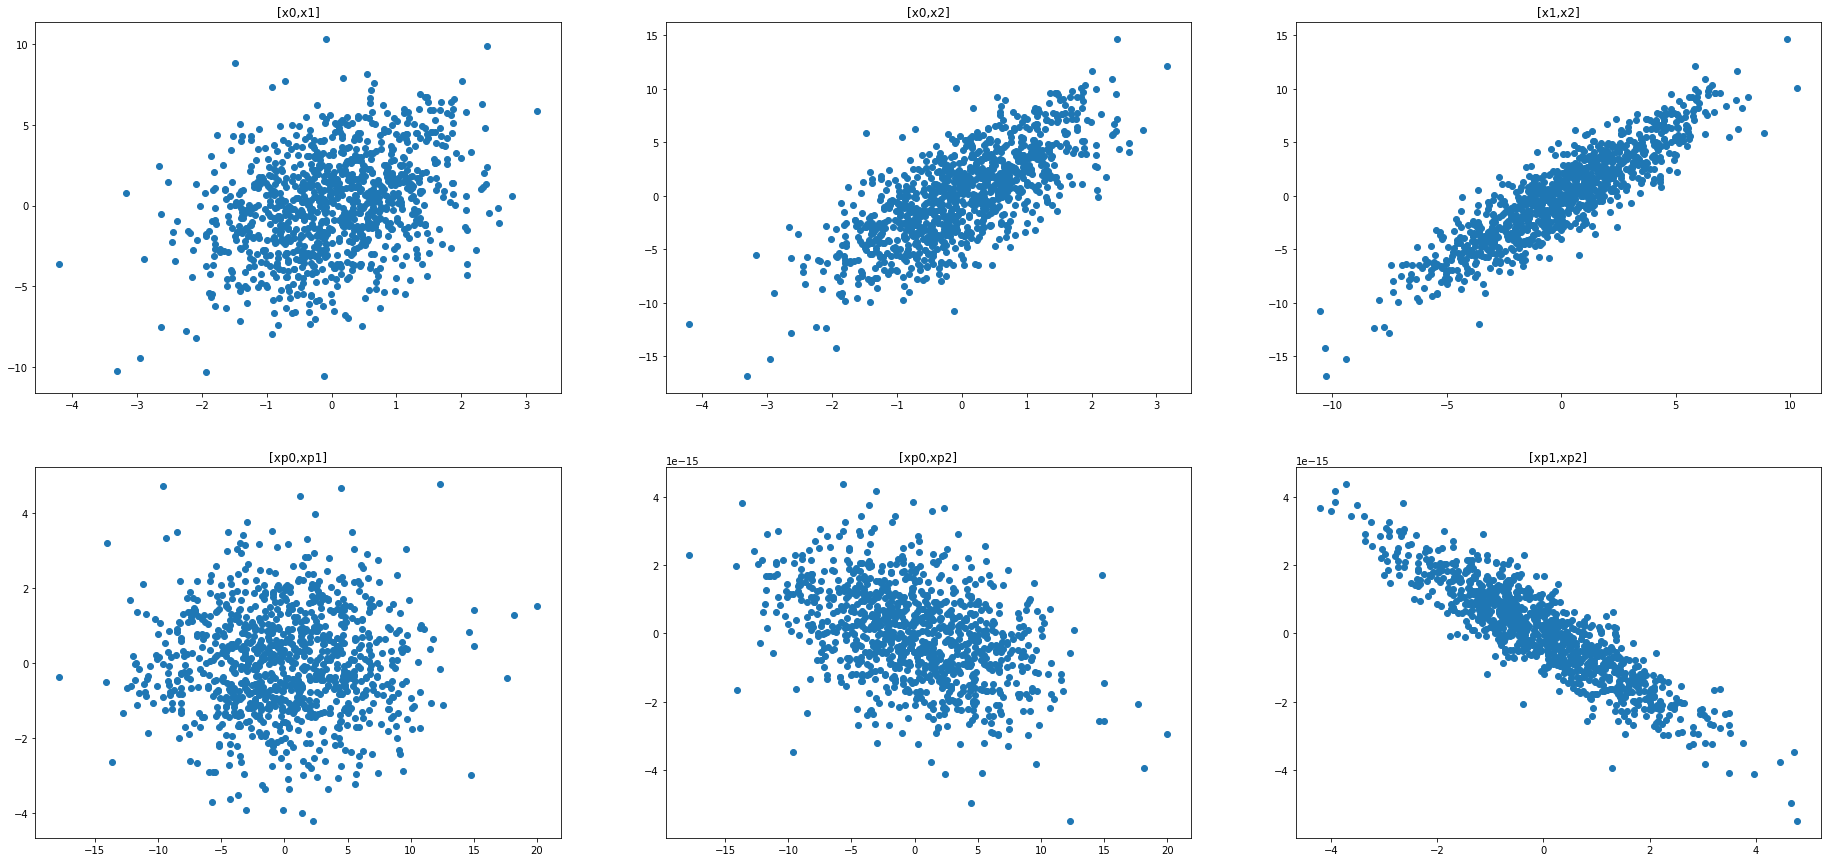

In [28]:
fig, axs = plt.subplots(2,3,figsize=(32,15))
axs[0][0].set_title('[x0,x1]')
axs[0][0].scatter(n_X[0,:],n_X[1,:])
axs[0][1].set_title('[x0,x2]')
axs[0][1].scatter(n_X[0,:],n_X[2,:])
axs[0][2].set_title('[x1,x2]')
axs[0][2].scatter(n_X[1,:],n_X[2,:])

axs[1][0].set_title('[xp0,xp1]')
axs[1][0].scatter(Xp[0,:],Xp[1,:])
axs[1][1].set_title('[xp0,xp2]')
axs[1][1].scatter(Xp[0,:],Xp[2,:])
axs[1][2].set_title('[xp1,xp2]')
axs[1][2].scatter(Xp[1,:],Xp[2,:])

plt.show()

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [46]:
import pandas as pd

data = pd.read_csv('data/magic04.data',header = None)
data = data.iloc[:,:10]
data

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [47]:
cov = data.cov()
cov

,0,1,2,3,4,5,6,7,8,9
0,1794.780934,598.863542,14.064229,-4.886995,-2.800380,-924.434103,-258.727155,11.814008,-9.706818,1324.864131
1,598.863542,336.577782,6.221102,-2.045137,-1.178226,-289.972346,-164.893734,15.186087,31.636694,461.786200
2,14.064229,6.221102,0.223349,-0.073511,-0.042243,-4.473078,2.293535,0.152121,-2.302925,15.435467
3,-4.886995,-2.045137,-0.073511,0.033421,0.019726,1.215195,-1.136528,-0.043003,1.122738,-4.485661
4,-2.800380,-1.178226,-0.042243,0.019726,0.012213,0.655333,-0.669389,-0.025239,0.662907,-2.515795
5,-924.434103,-289.972346,-4.473078,1.215195,0.655333,3505.357776,827.482747,3.147931,-86.066350,-914.690722
6,-258.727155,-164.893734,2.293535,-1.136528,-0.669389,827.482747,2601.012037,-18.266361,-247.985080,141.115155
7,11.814008,15.186087,0.152121,-0.043003,-0.025239,3.147931,-18.266361,433.782213,2.533034,17.785198
8,-9.706818,31.636694,-2.302925,1.122738,0.662907,-86.066350,-247.985080,2.533034,681.399004,-430.253247
9,1324.864131,461.786200,15.435467,-4.485661,-2.515795,-914.690722,141.115155,17.785198,-430.253247,5584.839983


In [48]:
l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

Eigenvalues:
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04] 

Eigenvectors:
 [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e-05  1.81386903e-03  1.88001798e-01
  -5.19365739e-

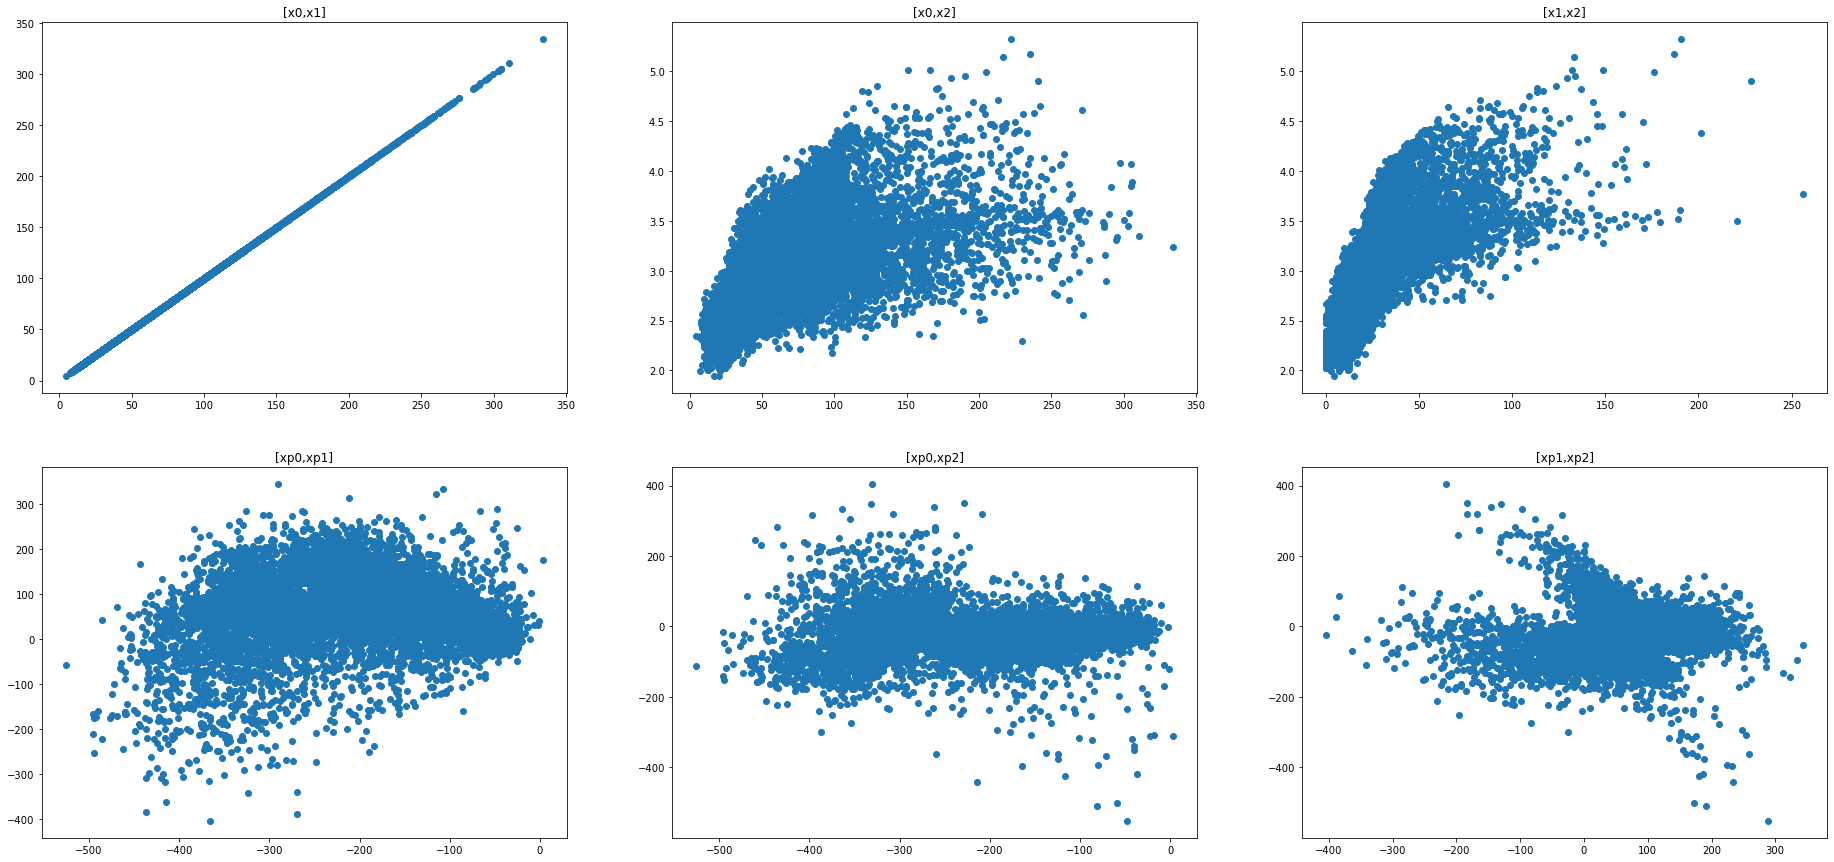

In [52]:
Xp = np.dot(V.T,data.T)

fig, axs = plt.subplots(2,3,figsize=(32,15))
axs[0][0].set_title('[x0,x1]')
axs[0][0].scatter(data.iloc[:,0],data.iloc[:,0])
axs[0][1].set_title('[x0,x2]')
axs[0][1].scatter(data.iloc[:,0],data.iloc[:,2])
axs[0][2].set_title('[x1,x2]')
axs[0][2].scatter(data.iloc[:,1],data.iloc[:,2])

axs[1][0].set_title('[xp0,xp1]')
axs[1][0].scatter(Xp[0,:],Xp[1,:])
axs[1][1].set_title('[xp0,xp2]')
axs[1][1].scatter(Xp[0,:],Xp[2,:])
axs[1][2].set_title('[xp1,xp2]')
axs[1][2].scatter(Xp[1,:],Xp[2,:])

plt.show()